Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>.

# Backpropagation

# Contents

- Perceptron

This is the most critical component of neural networks. In this section, we will learn about both forward propogation and backward propagation and the math behind back propagation.

### Perceptron

This is the most fundamental type of element in a neural network. We have already seen what a perceptron is in the basics of neural networks section. However, we just scratched the surface. In this section, we will explore a perceptron in detail and explore a couple of simple problems it can solve. 

<img src="./pics/perceptron_visual.png"/>

By definition, a perceptron can only solve **linearly separable** problems. What is a _linearly separable_ problem ? Here are a couple of examples that show you linearly separable data. For example, two if the iris species are linearly separable by a hyperplane (in this case a single line). Similarly, an OR gate is also an example of a linearly separable dataset.

<img src="./pics/linearly-separable-data.png"/>

Text(0.5, 1.0, 'OR gate')

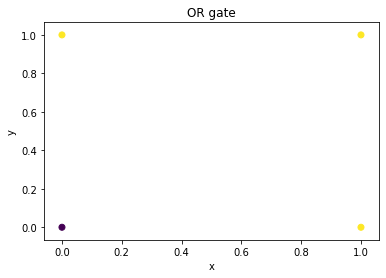

In [4]:
# Visualize a OR gate
import numpy as np

# OR gate data
x = np.array([[1,0],
              [0,1],
              [0,0],
              [1,1]])
y   = np.array([1,1,0,1])

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("OR gate")

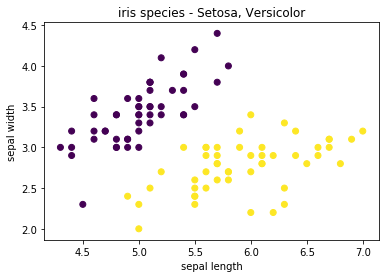

In [5]:
# Visualize just 2 species (setosa, versicolor) that are linearly separable 
# using the predictors (Sepel Length, Sepal, Width)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# iris data is readily available as a sklearn dataset.
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data

# visualize just the first 100 rows (so that it contains only the species setosa and versicolor)
# We are specifically not plotting the third species (virginica), because it is not 
# linearly separable.
plt.scatter(data[0:100,0],data[0:100,1],c=iris.target[0:100])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("iris species - Setosa, Versicolor")
plt.savefig("iris.png")

Now that we have an understanding of the data, let's use gradient descent to solve for the weights. 

<img src="./pics/solve-for-weights-using-back-propagation.png"/>

What we are essentially trying to do is to find out values for weights and bias in such a way that

## $ activation(x_1 \times w_1 + x_2 \times w_2 + b) = output $

The activation function in the case of a perceptron is a simple stepper function

## $y = f(x) $
where
### $f(x) = 1 \space if \space x>=0$
### $f(x) = 0 \space if \space x<0$

Here is how this function would look like.

Text(0.5, 1.0, 'Activation function - Binary step function ')

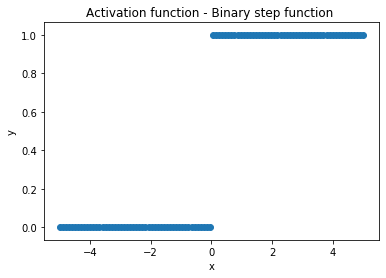

In [15]:
# Show how a binary step function looks like.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace (-5,5,100)
y = np.zeros(len(x))
y[x>=0] = 1
y[x<0] = 0

plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Activation function - Binary step function ")

Let's solve the OR gate problem using a simple, single layer perceptron. Let's start with the data first. Here is a quick high-level overview of the steps involved.

<img src="./pics/perceptron-from-scratch-in-python.png"/>

In [27]:
# OR gate data
x = np.array([[1,0],
              [0,1],
              [0,0],
              [1,1]])
y   = np.array([1,1,0,1])

Initialize the weights and bias.

<img src="./pics/initialize-weights-bias.png"/>

In [28]:
w = np.random.normal(size=2)
b = np.random.normal()

# learning rate. This is exactly the same term that we have already learnt in gradient descent.
alpha = 0.01

Forward propagation is a relatively easy step. Let's write a quick function for it .

In [29]:
def forward_prop(row) :
    y_hat = np.dot(x[row],w) + b
    if y_hat > 0 :
        return 1
    else :
        return 0

<img src="./pics/forward-propagation.png"/>

What about back propagation ? This is where gradient descent comes in (along with its paraphernelia of partial derivatives, learning rate, cost function etc). There are a couple of options to calculate the cost function (residual sum of squares & cross entropy), but for now, let's just use the residual sum of squares (RSS) cost function. We have already seen this in the gradient descent section.

## $Cost_{RSS} = \sum_{i=0}^n (y - \hat y)^2$

where
- $n$ - number of rows in the dataset
- $y$ - actual value
- $\hat y$ - predicted value

and $\hat y$ is $\hat y = x_1 \times w_1 + w_2 \times w_2 + b$

Let's subsitute $\hat y$ into the cost function above

## $Cost_{RSS} = \sum_{i=0}^n (y - x_1 \times w_1 + w_2 \times w_2 + b)^2$

Now, we want to see what the derivative of the cost function with respect to each of the variables (weights and bias).

## $\frac {\partial Cost_{RSS}}{\partial w_1} = (y - x_1 \times w_1 + w_2 \times w_2 + b) \times x_1 = (y - \hat y) \times x_1 $

similarly, the partial derivatives with respect to weight 2 (w2) and the bias (b) are

## $\frac {\partial Cost_{RSS}}{\partial w_2} = (y - \hat y) \times x_2 $
## $\frac {\partial Cost_{RSS}}{\partial b} = (y - \hat y) $

Once we have the partial derivatives, we can update the weights and biases 

## $w_{1 new} = w_{1 old} + \alpha \times \frac {\partial Cost_{RSS}}{\partial w_1} = w_{1 old} + \alpha \times (y - \hat y) \times x_1$
## $w_{2 new} = w_{2 old} + \alpha \times \frac {\partial Cost_{RSS}}{\partial w_2} = w_{2 old} + \alpha \times (y - \hat y) \times x_2$
## $b_{new} = b_{old} + \alpha \times \frac {\partial Cost_{RSS}}{\partial b} = b_{old} + \alpha \times (y - \hat y) $

These equations can rattle any ML engineer, but remember, all of this is left to the library (tensorflow or any of the underlying deep learning library) to compute. The only reason why we are learning all of the math and hand-coding this in Python is to ensure that we get an in-depth understanding of back propagation. This is absolutely essential to be a good ML engineer. 


Let's now write a function for back propagation using all the geeky stuff above.

In [30]:
def backward_prop(y_hat, row) :
    global b,w
    w[0]  = w[0] + alpha * (y[row] - y_hat) * x[row][0]
    w[1]  = w[1] + alpha * (y[row] - y_hat) * x[row][1]
    b     = b + alpha * (y[row] - y_hat) 

As of now, we are working on global variables to make things simple. Later, we will make a class out of all this to make things easy going forward. Just one more function to go, before we set this in motion. Assuming the model is in place (which we are going to write in a minute), we also need a function to predict a $y$ value, right ? Just like any Machine Learning algorithm, we need a **predict ( )** method. Once the model fits the data to the right set of weights, this one is very easy. All we have to do is run the data through one forward propagation cycle. 

<img src="./pics/predict-function.png"/>

In [31]:
# return the predicted y_hat, for the test data set.
def predict(x) :
    y = []
    
    # the user could be sending multiple rows. compute y_hat for each of the rows in the test dataset.
    for row in x :
        
        # weighted sum
        y_pred = np.dot(row,w) + b
        
        # run the weighted sum throught he activation function.
        if y_pred > 0 :
            y_pred = 1
        else :
            y_pred = 0
            
        # append the predicted y (y_hat)to an array
        y.append(y_pred)
        
    # return the predicted array of y_hat values for the corresponding test data (x)
    return y

The individual pieces of the simple perceptron have been coded. Now, we need to write the logic to

- take the input data. For each row
  - do one cycle of forward propagation
  - do one cycle of backward propagation and updated the weights and bias.
  
This exhausts one cycle of the input data. In Deep learning, this is called as an **epoch**. We need to repeat the entire process for a whole bunch of _epochs_.

Let's write the logic for this.

<img src="./pics/forward-and-back-propagation.png"/>

In [33]:
# number of epochs
for epoch in range(1000) :
    
    # for each row in x (cycle through the dataset)
    for row in range(x.shape[0]) :
        
        # for each row in x, predict y_hat
        y_hat = forward_prop(row)

        # for each row calculate weights
        backward_prop(y_hat,row)

print ( w, b)

SyntaxError: invalid syntax (<ipython-input-33-35be5f06b372>, line 13)

It is time to test our network. Let's quickly print out x and y.

In [34]:
x

array([[1, 0],
       [0, 1],
       [0, 0],
       [1, 1]])

In [35]:
y

array([1, 1, 0, 1])

Since this is a small dataset, we don't need a confusion matrix to calculate the accuracy. Let's just use the predict function on the x array to predict y.

In [38]:
predict(x)

[1, 1, 0, 1]

That's a perfect match. This is a small dataset. Let's look at a slightly larger dataset and see if the perceptron is good enough to do linear separation. Let's pick up the iris dataset from Scikit Learn's 

In [39]:
from sklearn import datasets

iris = datasets.load_iris()

data = iris.data

All of this data is not linearly separable. For example, if you plot the species against the sepal length and width, the species - versicolor and virginica are muddled. Only the first species (setosa) is clearly separated. 

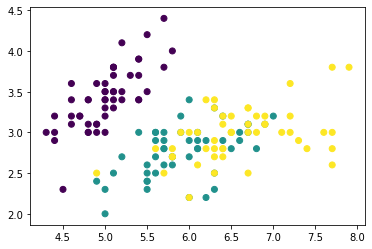

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data[:,0],data[:,1],c=iris.target)

So, let's just use the first two species. Let's plot it again. 

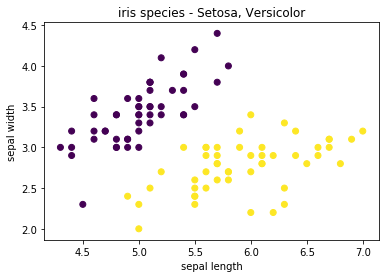

In [41]:
# visualize just the first 100 rows (so that it contains only the species setosa and versicolor)
# We are specifically not plotting the third species (virginica), because it is not 
# linearly separable.
plt.scatter(data[0:100,0],data[0:100,1],c=iris.target[0:100])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("iris species - Setosa, Versicolor")
plt.savefig("iris.png")

Now, we have a clear, linear separation. Let's train our perceptron on this data and see if it works. 

In [42]:
x = data[0:100,0:2]  # iris sepal data ( sepal length and width )
y = iris.target[0:100] # iris species data (only setosa and versicolor)

w = np.random.normal(size=2)
b = np.random.normal()

# learning rate
alpha = 0.01

# number of epochs
for epoch in range(1000) :
    
    # for each row in x
    for row in range(x.shape[0]) :
        
        # for each row in x, predict y_hat
        y_hat = forward_prop(row)
        # for each row calculate weights
        backward_prop(y_hat,row)

print ( w, b)

[ 0.86403359 -1.01961332] -1.2300192020223917


In [ ]:
We can very well do a confusion matrix to check for accuracy. 

In [44]:
y_pred = predict(x)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print ( confusion_matrix(y,y_pred) )
print ( accuracy_score(y,y_pred))

[[48  2]
 [ 0 50]]
0.98


That a pretty good accuracy - almost 98%. It is a bit more interesting to see this visually - using matplotlib's meshgrid.

In [48]:
import numpy as np
 
x_all = np.linspace(0,10,100).reshape(-1,1)
y_all = np.linspace(0,10,100).reshape(-1,1)
 
xx,yy = np.meshgrid(x_all,y_all)

In [50]:
x_grid = np.concatenate((xx.ravel().reshape(-1,1),yy.ravel().reshape(-1,1)),axis=1)

In [52]:
x_grid

array([[ 0.       ,  0.       ],
       [ 0.1010101,  0.       ],
       [ 0.2020202,  0.       ],
       ...,
       [ 9.7979798, 10.       ],
       [ 9.8989899, 10.       ],
       [10.       , 10.       ]])

In [53]:
y_grid = predict(x_grid)

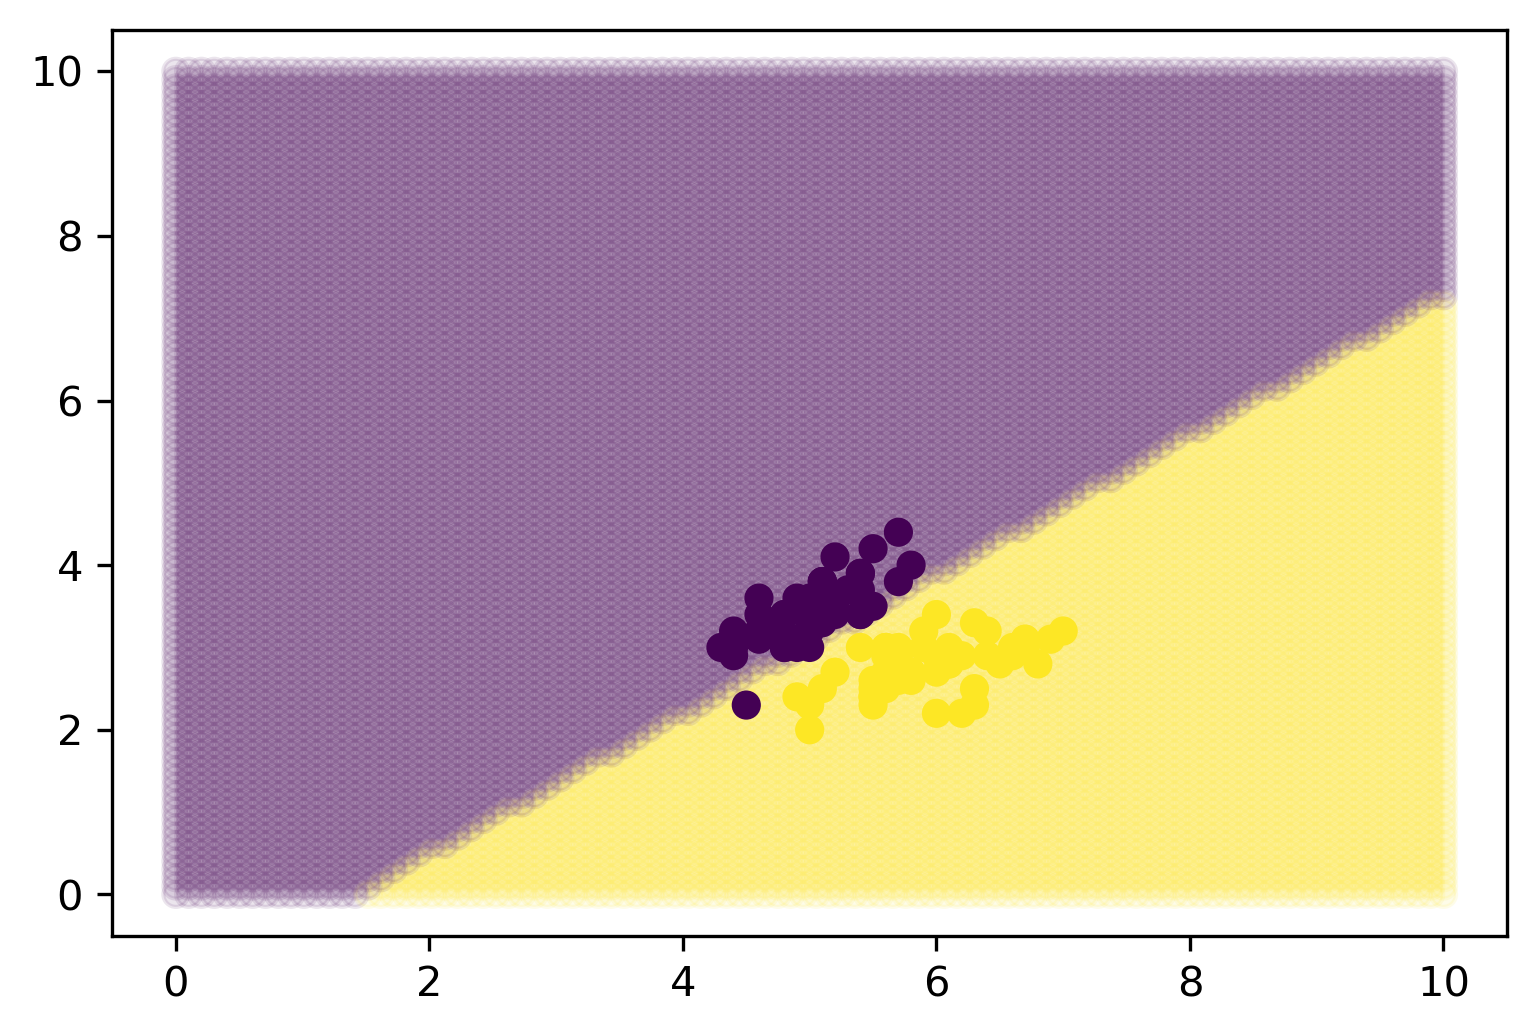

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['figure.dpi'] = 300

plt.scatter(x_grid[:,0],x_grid[:,1],c=y_grid,alpha=0.1)
plt.scatter(data[0:100,0],data[0:100,1],c=iris.target[0:100])

There we go, 

In [68]:
xx

array([[0.        , 0.03030303, 0.06060606, ..., 2.93939394, 2.96969697,
        3.        ],
       [0.        , 0.03030303, 0.06060606, ..., 2.93939394, 2.96969697,
        3.        ],
       [0.        , 0.03030303, 0.06060606, ..., 2.93939394, 2.96969697,
        3.        ],
       ...,
       [0.        , 0.03030303, 0.06060606, ..., 2.93939394, 2.96969697,
        3.        ],
       [0.        , 0.03030303, 0.06060606, ..., 2.93939394, 2.96969697,
        3.        ],
       [0.        , 0.03030303, 0.06060606, ..., 2.93939394, 2.96969697,
        3.        ]])

In [159]:
x = data[0:100,0:2]
y = iris.target[0:100]

In [160]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
b = np.random.normal()

In [ ]:
w = np.random.normal(size=2)
b = np.random.normal()
alpha = 0.01